## Ensemble - Random Forest(Bagging Ensemble)


In [36]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [37]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [39]:
df.shape

(891, 8)

In [40]:
m = df.isna().sum()
m[m>0]

Age         177
Embarked      2
dtype: int64

In [41]:
df.duplicated().sum()

111

In [42]:
x= df.drop(columns =['Survived'])
y=df[['Survived']]

In [43]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [44]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [45]:
y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

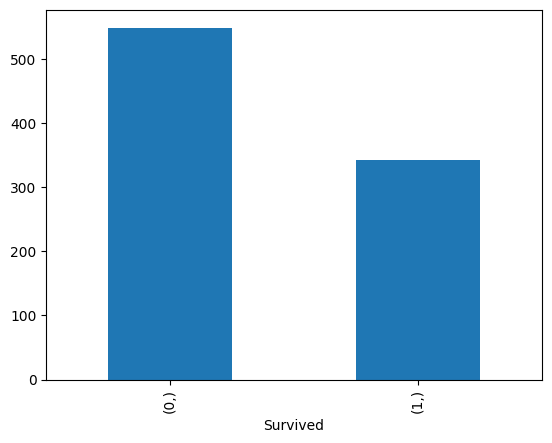

In [46]:
y.value_counts().plot(kind= 'bar')

## Step 4: Perform preprocessing on X


In [47]:
cat = list(x.columns[x.dtypes == 'object'])
con = list (x.columns[x.dtypes!= 'object'])

In [48]:
cat

['Sex', 'Embarked']

In [49]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [51]:
num_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy= 'median')), 
                             ('scaler', StandardScaler())])

In [52]:
cat_pipe = Pipeline(steps= [('impute', SimpleImputer(strategy= 'most_frequent')), 
                            ('ohe', OneHotEncoder(handle_unknown = 'ignore', 
                                                  sparse_output = False))])

In [53]:
pre = ColumnTransformer([('num', num_pipe, con), ('cat', cat_pipe, cat)]).set_output(transform = 'pandas')

In [54]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


## Step 5: Apply train test split

In [55]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size = 0.2, random_state = 42)

In [56]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [57]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [58]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [59]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


## Step 6: Build the model

In [60]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 1, 
                                criterion = 'gini', 
                                max_depth = 1, 
                                min_samples_split = 5, 
                                min_samples_leaf = 5)
model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [61]:
model1.score(xtrain, ytrain)

0.6657303370786517

In [62]:
model1.score(xtest, ytest)

0.6759776536312849

## tune the model with hyperparameter tuning

In [63]:
params1 = {'n_estimators': [10, 50, 100, 200], 
          'max_depth': [1, 2, 3, 4, 5, 6, 7], 
          'min_samples_split': [5, 7, 8, 9, 10]}

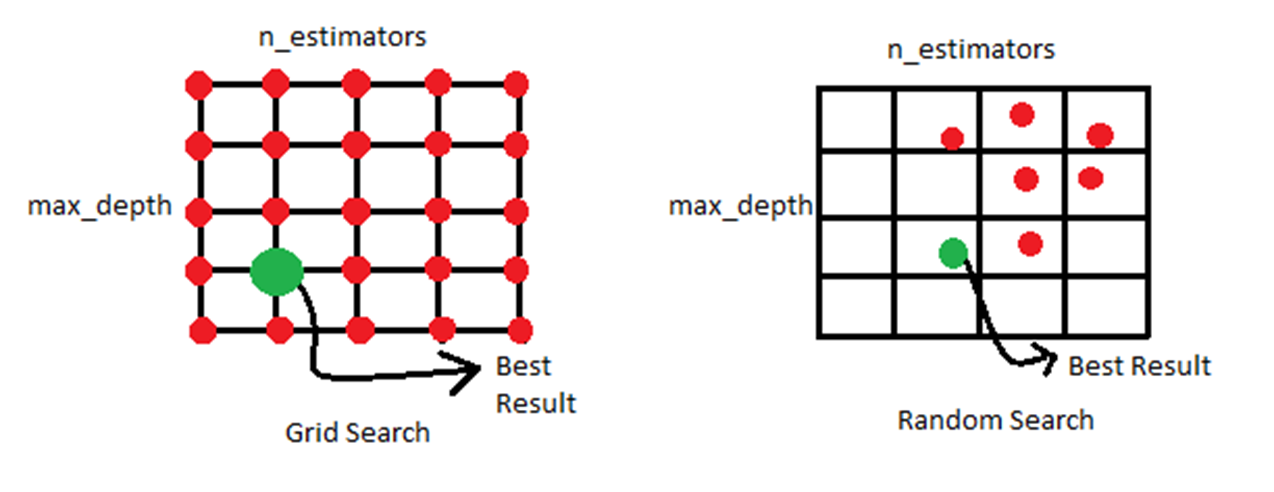

In [64]:
# for faster response use Randonized SearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions = params1, cv= 5, scoring = 'f1_micro')
rscv1.fit(xtrain, ytrain)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 7, 8, 9, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_micro')

In [65]:
rscv1.best_params_

{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 4}

In [66]:
rscv1.best_score_

0.8300206835418104

In [67]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=4, min_samples_split=5)

## Evaluate random Forest

In [68]:
best_rfc.score(xtrain, ytrain)

0.848314606741573

In [69]:
best_rfc.score(xtest, ytest)

0.8044692737430168

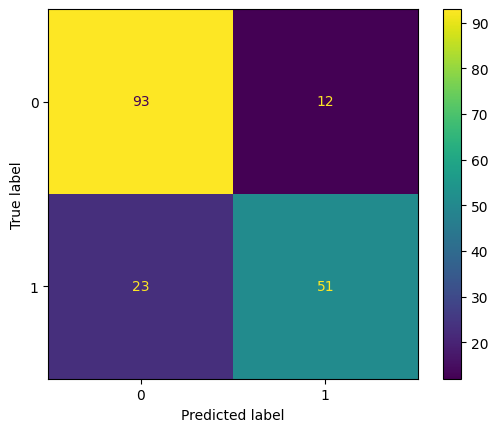

In [73]:
# Confsion Matirix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest, ytest)

In [74]:
# pridict the results fro train and test
ypred_train = best_rfc.predict(xtrain)
ypred_test = best_rfc.predict(xtest)

In [75]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [76]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [77]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [79]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Gradiant Goosing Model

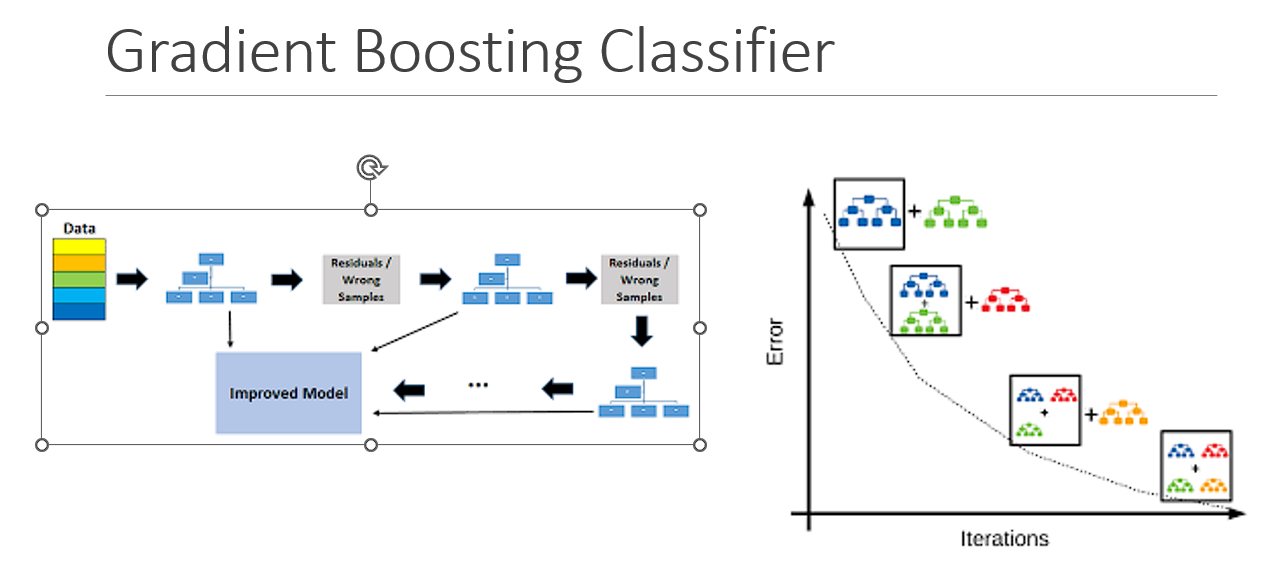

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate = 0.5, 
                                    n_estimators = 1, 
                                    max_depth = 1, 
                                    min_samples_split =5, 
                                    min_samples_leaf = 5)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [84]:
model2.score(xtrain, ytrain)

0.7879213483146067

In [85]:
model2.score(xtest, ytest)

0.7821229050279329

## HyperParameter Tuning

In [86]:
param2 = {'n_estimators': [10, 50, 100, 200, 300], 
          'learning_rate' : [0.01, 0.05, 0.1, 0.2], 
          'max_depth': [2, 3, 4, 5, 6, 7]}

In [88]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=param2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [90]:
rscv2.best_params_

{'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.05}

In [91]:
rscv2.best_score_

0.8024143613513243

In [92]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=200)

In [93]:
best_gbc.score(xtrain, ytrain)

0.8693820224719101

In [94]:
best_gbc.score(xtest, ytest)

0.8100558659217877

## Evaluate Model

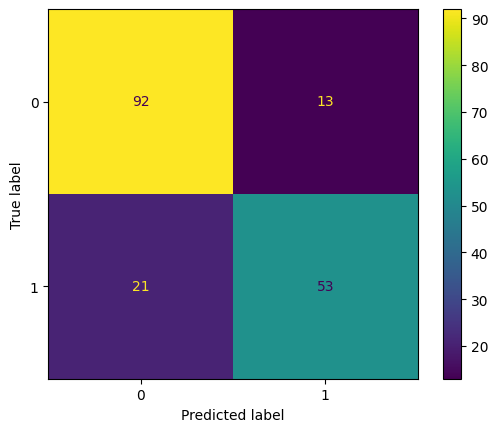

In [95]:
ConfusionMatrixDisplay.from_estimator(best_gbc, xtest, ytest)

In [96]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2= best_gbc.predict(xtest)

In [97]:
ypred_test2[0:5]

SyntaxError: unmatched ']' (1866389715.py, line 1)

In [98]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [99]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Gradiant Boosing model is slightly better im this case and accuracy is more than 80 % i tset

## Choosing gradient boosting model for final out of sample prediction